# MULTI-STRATEGY

In [28]:
import pandas as pd
import itable
import ffn
import talib

%matplotlib inline

def side_by_side(*objs, **kwds):
    from pandas.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    
import os
os.chdir('C:\\Users\\scuba\Google Drive\\PycharmProjects\\SimpleBacktester\\backtest_helpers')
os.getcwd()

'C:\\Users\\scuba\\Google Drive\\PycharmProjects\\SimpleBacktester\\backtest_helpers'

In [30]:
import pandas as pd
import ffn

%matplotlib inline

from backtest_helpers.compute_weights_RS_DM import compute_weights_RS_DM
from backtest_helpers.compute_weights_PMA import compute_weights_PMA
from backtest_helpers.monthly_return_table import monthly_return_table
from backtest_helpers.endpoints import endpoints
from backtest_helpers.backtest import backtest

strategies = {
    'RS0001': { 'symbols': ['VCVSX','VWEHX','VFIIX','FGOVX','VWAHX'], 'prices': 'yahoo',  
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['MMHYX','FAGIX','VFIIX'],  'prices': 'yahoo', 
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0003': {'symbols': ['MMHYX','FAGIX','VFIIX'], 'prices': 'yahoo', 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'q',
              'cash_proxy': 'CASHX', 'risk_free': 0},    
    'DM0001': {'symbols': ['VCVSX','VWINX','VWEHX','VGHCX','VUSTX','VFIIX','VWAHX','FGOVX','FFXSX'],
                'prices': 'yahoo', 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 'FFXSX'},
    'DM0002': {'symbols': ['VCVSX','VUSTX','VWEHX','VFIIX','VGHCX','FRESX'], 'prices': 'yahoo', 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'm',
              'cash_proxy': 'VFIIX', 'risk_free': 'FFXSX'},
    'PMA001': {'symbols': ['VCVSX', 'VFIIX'],  'prices': 'yahoo', 
               'risk_lookback': 3, 'frequency': 'm', 'allocations': [0.6, 0.4],
              'cash_proxy': 'VUSTX'},
    'PMA002': {'symbols': ['VCVSX', 'VWINX', 'VWEHX'], 'prices': 'yahoo', 
               'risk_lookback': 3, 'frequency': 'm', 'allocations': [0.6, 0.2, 0.2],
              'cash_proxy': 'VUSTX'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 'prices': 'yahoo',  
               'risk_lookback': 2, 'frequency': 'm', 'allocations': [1./3., 1./3., 1./3.],
              'cash_proxy': 'VUSTX'},    
}

strategy_values = pd.DataFrame(columns=strategies.keys())
security_weights = {}
security_holdings = {}
security_prices = {}

for name in strategies :
    if 'PMA' in name :
        s_value, s_holdings, s_weights, s_prices =  compute_weights_PMA (name, strategies[name])
    else :
        s_value, s_holdings, s_weights, s_prices =  compute_weights_RS_DM (name, strategies[name])
    
    strategy_values[name] = s_value
    security_weights[name] = s_weights
    security_holdings[name] = s_holdings
    security_prices[name] = s_prices

Strategy : DM0001


UnboundLocalError: local variable 'months' referenced before assignment

In [12]:
prices

NameError: name 'prices' is not defined

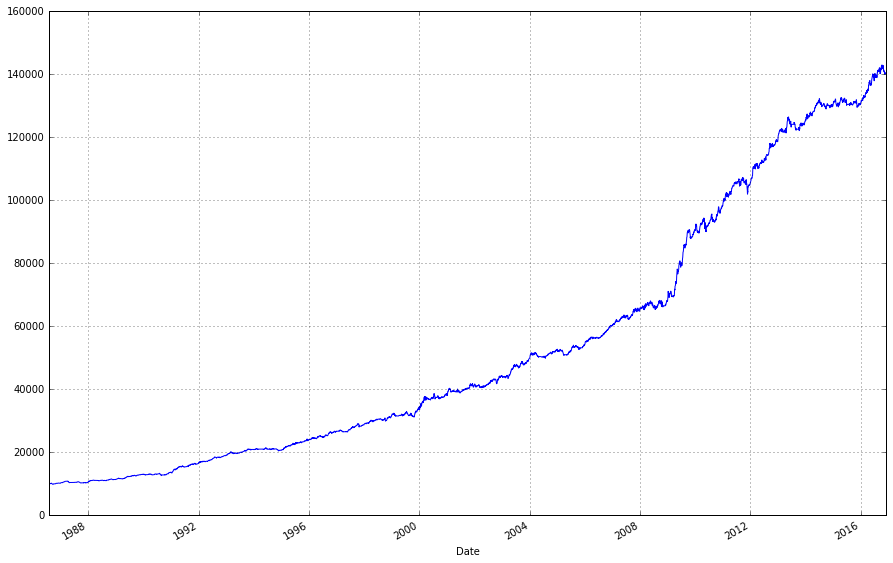

In [3]:
name = 'RS0001'
strategy_values[name].plot(figsize=(15, 10), grid=True)

In [5]:
index = strategy_values.dropna().index
rebalance_dates = endpoints(period='m', trading_days=index)

# find the set of all portfolio symbols
n = len(strategies)
l = [list(security_weights[name].columns) for name in strategies]
s = []
for i in range(n) :
    s = s + l[i]
    
aggregated_weights = pd.DataFrame(0, index=rebalance_dates, columns=list(set(s)))
all_prices = pd.DataFrame(0, index=index, columns=list(set(s)))

# for equally weighted strategies
strategy_weights = pd.Series([1. / n for i in range(n)], index=list(strategies.keys()))

prices = security_prices.copy()
for name in strategies :
    aggregated_weights[security_weights[name].columns] += security_weights[name].loc[rebalance_dates] * strategy_weights[name]
    all_prices = prices[name].loc[index].combine_first(all_prices)
    


In [6]:
all_prices[:15]

,CASHX,FAGIX,FFXSX,FGOVX,FRESX,MMHYX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,,,,,
1986-12-31,1.0,0.758814,2.379192,1.876035,2.116003,1.553293,1.209364,1.692999,2.687786,1.349658,1.849020,0.728181,2.085360
1987-01-02,1.0,0.759595,2.379192,1.881510,2.137291,1.553444,1.215611,1.694684,2.725879,1.357559,1.849020,0.728973,2.099459
1987-01-05,1.0,0.761156,2.379192,1.885159,2.167093,1.554963,1.228104,1.696368,2.782255,1.360192,1.850753,0.730556,2.119966
1987-01-06,1.0,0.762718,2.379192,1.885159,2.173480,1.558000,1.234351,1.696368,2.786826,1.362826,1.861151,0.732930,2.123811
1987-01-07,1.0,0.765060,2.379192,1.886984,2.186252,1.561037,1.236850,1.699737,2.818824,1.366776,1.864617,0.734513,2.132783
1987-01-08,1.0,0.768182,2.379192,1.890634,2.196896,1.562556,1.240598,1.703106,2.849297,1.370726,1.869815,0.736888,2.152009
1987-01-09,1.0,0.768963,2.379192,1.890634,2.194768,1.562556,1.243096,1.703106,2.861487,1.369409,1.871548,0.737679,2.146882
1987-01-12,1.0,0.769744,2.379192,1.890634,2.199025,1.564074,1.245595,1.704791,2.881295,1.374676,1.873281,0.739262,2.152009
1987-01-13,1.0,0.769744,2.379192,1.888809,2.201154,1.564074,1.245595,1.704791,2.882819,1.370726,1.875014,0.740054,2.149446


In [7]:
aggregated_weights.round(3)[:15]

,CASHX,FFXSX,VCVSX,VFIIX,FGOVX,VWINX,VWEHX,VUSTX,MMHYX,FAGIX,FRESX,VGHCX,VWAHX
1986-12-31,0.000,0.000,0.000,0.354,0.000,0.000,0.154,0.367,0.125,0.000,0.000,0.000,0.000
1987-01-30,0.000,0.000,0.321,0.200,0.000,0.067,0.050,0.000,0.125,0.042,0.025,0.108,0.062
1987-02-27,0.000,0.000,0.321,0.050,0.000,0.025,0.154,0.025,0.000,0.292,0.025,0.108,0.000
1987-03-31,0.000,0.042,0.279,0.075,0.000,0.000,0.154,0.025,0.000,0.292,0.025,0.108,0.000
1987-04-30,0.375,0.000,0.000,0.125,0.000,0.000,0.000,0.375,0.000,0.125,0.000,0.000,0.000
1987-05-29,0.417,0.042,0.000,0.100,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.108,0.000
1987-06-30,0.250,0.000,0.279,0.050,0.000,0.067,0.050,0.025,0.000,0.042,0.025,0.108,0.104
1987-07-31,0.125,0.000,0.321,0.100,0.000,0.025,0.050,0.042,0.125,0.000,0.000,0.108,0.104
1987-08-31,0.000,0.000,0.321,0.075,0.000,0.067,0.154,0.092,0.250,0.042,0.000,0.000,0.000
1987-09-30,0.375,0.000,0.000,0.125,0.000,0.000,0.000,0.375,0.125,0.000,0.000,0.000,0.000


FIRST BUY DATE = 1986-12-31 00:00:00



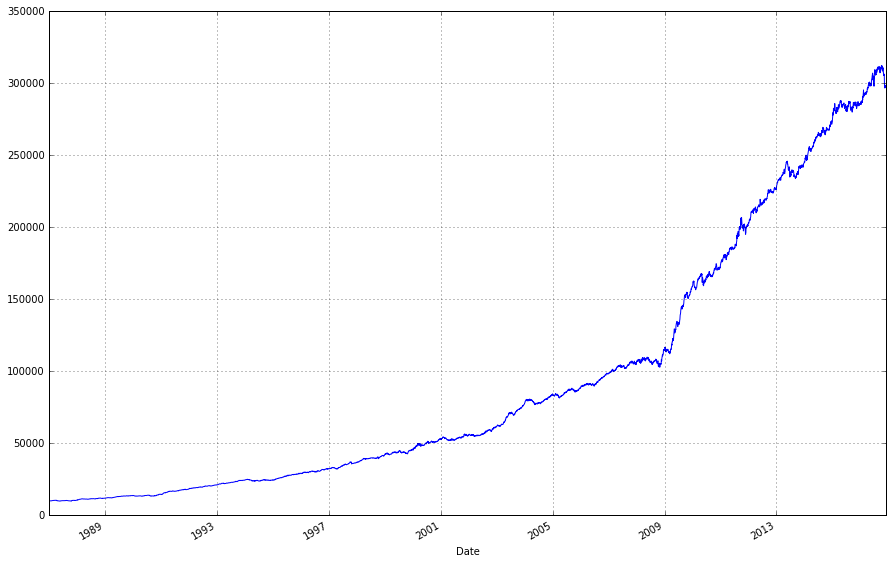

In [8]:
# equally weighted
from backtest_helpers.backtest import backtest
p_value, p_holdings, p_weights = backtest(all_prices, aggregated_weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15, 10), grid=True)

In [9]:
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-12-31 00:00:00 - 2016-11-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
2871.02%            2.27  12.00%  -6.37%

Annualized Returns:
mtd     3m      6m      ytd    1y     3y     5y     10y     incep.
------  ------  ------  -----  -----  -----  -----  ------  --------
-3.22%  -4.28%  -1.84%  3.90%  3.96%  6.91%  8.26%  11.70%  12.00%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  2.27     2.10       1.56
mean    11.46%   11.54%     12.22%
vol     5.05%    5.50%      7.81%
skew    -0.02    0.20       1.55
kurt    4.82     0.96       3.69
best    3.12%    6.78%      38.82%
worst   -2.85%   -3.52%     -0.12%

Drawdowns:
max     avg       # days
------  ------  --------
-6.37%  -0.68%     15.51

Misc:
---------------  ------
avg. up month    1.64%
avg. down month  -1.00%
up year %        96.67%
12m up %         9

G:\Anaconda3\lib\site-packages\ffn\core.py:190: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  self.monthly_prices = obj.resample('M', how='last')
G:\Anaconda3\lib\site-packages\ffn\core.py:193: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  self.yearly_prices = obj.resample('A', how='last')


## Now apply Dual Momentum

In [10]:
strategy_prices = strategy_values.dropna().copy()
strategy_prices[:3]

,RS0001,RS0002,PMA003,PMA001,DM0002,RS0003,DM0001,PMA002
Date,,,,,,,,
1986-12-31,10285.878930,13600.274821,10152.482090,10039.994842,10000.000000,14659.459302,10000.000000,9883.509662
1987-01-02,10296.591246,13613.810838,10211.915488,10079.256799,10019.855086,14660.884389,10026.456642,9931.946656
1987-01-05,10312.887136,13627.338822,10231.721606,10095.003452,10034.072743,14675.220203,10043.521506,9951.668939


In [11]:

# need to add prices for cash_proxy and, if necessary, risk_free

from backtest_helpers.get_yahoo_data import get_yahoo_data

strategy_prices['FFXSX'] = get_yahoo_data(['FFXSX']).loc[index]
strategy_prices[:1]

FFXSX


,RS0001,RS0002,PMA003,PMA001,DM0002,RS0003,DM0001,PMA002,FFXSX
Date,,,,,,,,,
1986-12-31,10285.87893,13600.274821,10152.48209,10039.994842,10000.0,14659.459302,10000.0,9883.509662,2.379192


In [12]:
strategies1 = {
    'MUTLTI-RS': { 'symbols': list(strategies.keys()), 'prices': strategy_prices,  
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 8, 'frequency': 'm',
              'cash_proxy': 'FFXSX', 'risk_free': 0}}

for name in strategies1 :
    s_value, s_holdings, s_weights, s_prices =  compute_weights_RS_DM (name, strategies1[name])

Strategy : MUTLTI-RS
FIRST BUY DATE = 1987-01-30 00:00:00



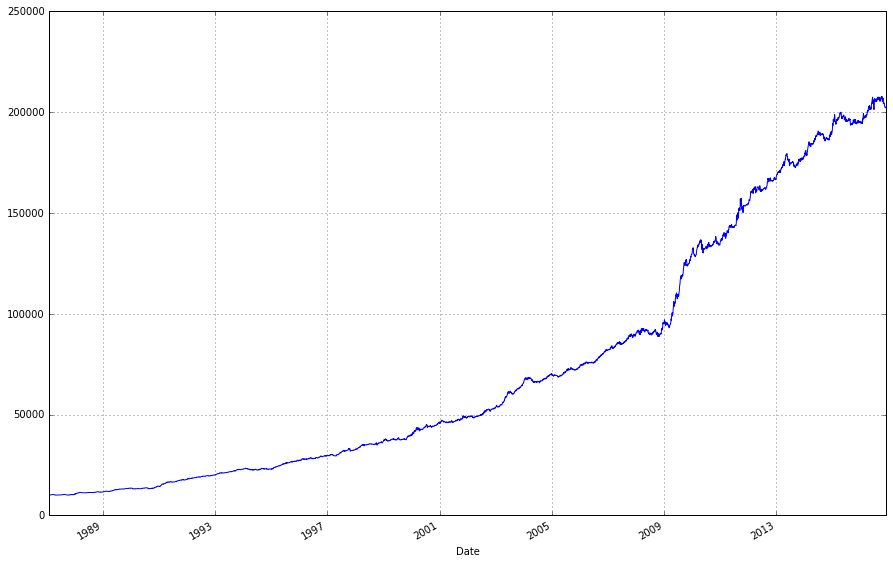

In [33]:
s_value.plot(figsize=(15, 10), grid=True)

In [13]:
# poorer return but lower drawdown and better SR
ffn.calc_perf_stats(s_value).display()

Stats for None from 1987-01-30 00:00:00 - 2016-11-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1922.51%             2.3  10.60%  -4.78%

Annualized Returns:
mtd     3m      6m      ytd    1y     3y     5y     10y    incep.
------  ------  ------  -----  -----  -----  -----  -----  --------
-0.99%  -2.15%  -1.07%  3.63%  3.56%  4.50%  5.64%  9.48%  10.60%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  2.30     2.11       1.46
mean    10.17%   10.24%     10.97%
vol     4.42%    4.84%      7.51%
skew    -0.07    0.56       1.59
kurt    5.49     1.80       3.58
best    2.10%    6.78%      36.37%
worst   -2.85%   -2.79%     0.28%

Drawdowns:
max     avg       # days
------  ------  --------
-4.78%  -0.63%     17.15

Misc:
---------------  -------
avg. up month    1.37%
avg. down month  -0.86%
up year %        100.00%
12m up %         98.

G:\Anaconda3\lib\site-packages\ffn\core.py:190: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  self.monthly_prices = obj.resample('M', how='last')
G:\Anaconda3\lib\site-packages\ffn\core.py:193: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  self.yearly_prices = obj.resample('A', how='last')


In [14]:
def highlight_pos_neg (s) :
    is_positive = s > 0    
    return ['background-color : rgb(127,255,0)' if v else 'background-color : rgb(255,99,71)' for v in is_positive]

df = monthly_return_table (s_value)

df.style.\
    apply(highlight_pos_neg)

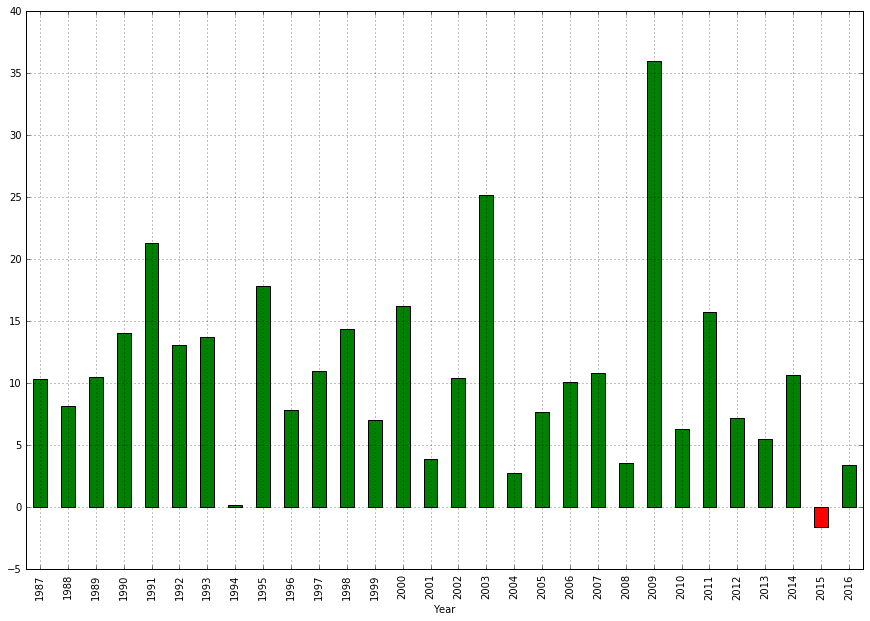

In [15]:
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

### Need to determine the holdings of each security

In [16]:
s_weights.loc[rebalance_dates].round(3)[:15]

,RS0001,RS0002,PMA003,PMA001,DM0002,RS0003,DM0001,PMA002,FFXSX
Date,,,,,,,,,
1986-12-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1987-01-30,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000
1987-02-27,0.125,0.125,0.125,0.125,0.125,0.000,0.125,0.125,0.125
1987-03-31,0.125,0.125,0.125,0.000,0.125,0.125,0.125,0.000,0.250
1987-04-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1987-05-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1987-06-30,0.000,0.000,0.125,0.125,0.125,0.000,0.125,0.125,0.375
1987-07-31,0.125,0.000,0.125,0.125,0.125,0.000,0.125,0.125,0.250
1987-08-31,0.125,0.125,0.125,0.125,0.125,0.000,0.125,0.125,0.125


In [17]:
# get weights from backtest
strategy_weights = s_weights.loc[rebalance_dates].copy()
strategy_weights.round(3)[:15]

,RS0001,RS0002,PMA003,PMA001,DM0002,RS0003,DM0001,PMA002,FFXSX
Date,,,,,,,,,
1986-12-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1987-01-30,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.000
1987-02-27,0.125,0.125,0.125,0.125,0.125,0.000,0.125,0.125,0.125
1987-03-31,0.125,0.125,0.125,0.000,0.125,0.125,0.125,0.000,0.250
1987-04-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1987-05-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1987-06-30,0.000,0.000,0.125,0.125,0.125,0.000,0.125,0.125,0.375
1987-07-31,0.125,0.000,0.125,0.125,0.125,0.000,0.125,0.125,0.250
1987-08-31,0.125,0.125,0.125,0.125,0.125,0.000,0.125,0.125,0.125


In [18]:
aggregated_weights = pd.DataFrame(0, index=rebalance_dates, columns=list(set(s + ['FFXSX'])))
all_prices = pd.DataFrame(0, index=index, columns=list(set(s + ['FFXSX'])))

# get weights from backtest
strategy_weights = s_weights.loc[rebalance_dates].copy()

prices = security_prices.copy()
for name in strategies :
    aggregated_weights[security_weights[name].columns] += security_weights[name].loc[rebalance_dates].mul(strategy_weights[name],axis=0)
    all_prices = prices[name].loc[index].combine_first(all_prices)
    
# need to add in the cash_proxy weights
aggregated_weights['FFXSX'] = aggregated_weights['FFXSX'].add(strategy_weights['FFXSX'], axis=0)
aggregated_weights.round(3)[:15]

,CASHX,FFXSX,VCVSX,VFIIX,FGOVX,VWINX,VWEHX,VUSTX,MMHYX,FAGIX,FRESX,VGHCX,VWAHX
1986-12-31,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1987-01-30,0.0,0.000,0.321,0.200,0.0,0.067,0.050,0.000,0.125,0.042,0.025,0.108,0.062
1987-02-27,0.0,0.125,0.321,0.050,0.0,0.025,0.154,0.025,0.000,0.167,0.025,0.108,0.000
1987-03-31,0.0,0.292,0.129,0.025,0.0,0.000,0.129,0.000,0.000,0.292,0.025,0.108,0.000
1987-04-30,0.0,1.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1987-05-29,0.0,1.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1987-06-30,0.0,0.375,0.217,0.050,0.0,0.067,0.050,0.025,0.000,0.042,0.025,0.108,0.042
1987-07-31,0.0,0.250,0.321,0.100,0.0,0.025,0.050,0.042,0.000,0.000,0.000,0.108,0.104
1987-08-31,0.0,0.125,0.321,0.075,0.0,0.067,0.154,0.092,0.125,0.042,0.000,0.000,0.000
1987-09-30,0.0,1.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [19]:
all_prices[:15]

,CASHX,FAGIX,FFXSX,FGOVX,FRESX,MMHYX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,,,,,
1986-12-31,1.0,0.758814,2.379192,1.876035,2.116003,1.553293,1.209364,1.692999,2.687786,1.349658,1.849020,0.728181,2.085360
1987-01-02,1.0,0.759595,2.379192,1.881510,2.137291,1.553444,1.215611,1.694684,2.725879,1.357559,1.849020,0.728973,2.099459
1987-01-05,1.0,0.761156,2.379192,1.885159,2.167093,1.554963,1.228104,1.696368,2.782255,1.360192,1.850753,0.730556,2.119966
1987-01-06,1.0,0.762718,2.379192,1.885159,2.173480,1.558000,1.234351,1.696368,2.786826,1.362826,1.861151,0.732930,2.123811
1987-01-07,1.0,0.765060,2.379192,1.886984,2.186252,1.561037,1.236850,1.699737,2.818824,1.366776,1.864617,0.734513,2.132783
1987-01-08,1.0,0.768182,2.379192,1.890634,2.196896,1.562556,1.240598,1.703106,2.849297,1.370726,1.869815,0.736888,2.152009
1987-01-09,1.0,0.768963,2.379192,1.890634,2.194768,1.562556,1.243096,1.703106,2.861487,1.369409,1.871548,0.737679,2.146882
1987-01-12,1.0,0.769744,2.379192,1.890634,2.199025,1.564074,1.245595,1.704791,2.881295,1.374676,1.873281,0.739262,2.152009
1987-01-13,1.0,0.769744,2.379192,1.888809,2.201154,1.564074,1.245595,1.704791,2.882819,1.370726,1.875014,0.740054,2.149446


In [20]:
from backtest_helpers.backtest import backtest

aggregated_weights = aggregated_weights[aggregated_weights.sum(1) > 0]
values, holdings, weights = backtest(all_prices, aggregated_weights, 10000., offset=0, commission=10.)

FIRST BUY DATE = 1987-01-30 00:00:00



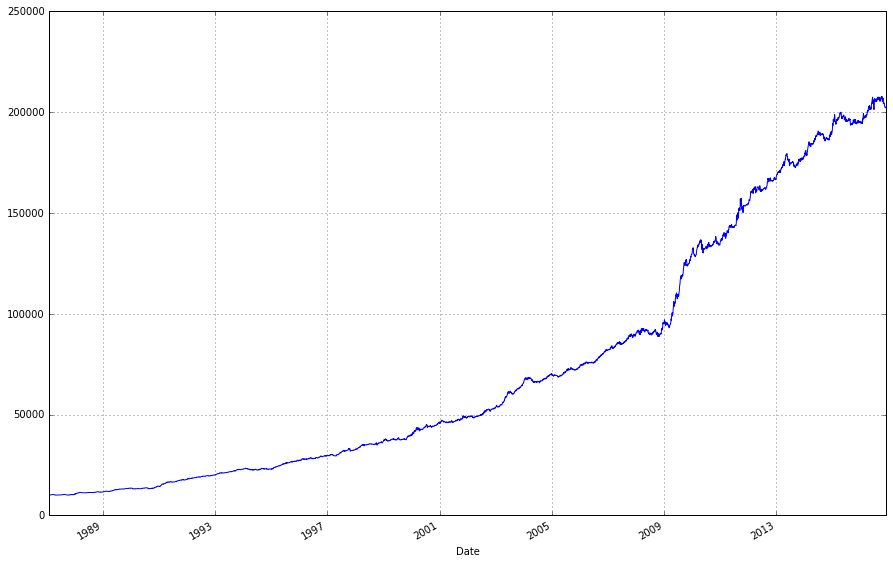

In [22]:
# just to check nothing changed
values.plot(figsize=(15, 10), grid=True)

In [25]:
transactions = (holdings - holdings.shift(1).fillna(0))
transactions = transactions[transactions.sum(1) != 0]
transactions.round(0)[:15]

,CASHX,FAGIX,FFXSX,FGOVX,FRESX,MMHYX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,,,,,
1987-01-30,0.0,531.0,0.0,0.0,113.0,793.0,2530.0,1165.0,350.0,0.0,328.0,671.0,306.0
1987-02-27,0.0,1623.0,532.0,0.0,1.0,-793.0,-79.0,-870.0,4.0,186.0,-328.0,1406.0,-188.0
1987-03-31,0.0,1608.0,715.0,0.0,-1.0,0.0,-1458.0,-146.0,-10.0,-186.0,0.0,-337.0,-117.0
1987-04-30,0.0,-3762.0,2966.0,0.0,-113.0,0.0,-993.0,-149.0,-344.0,0.0,0.0,-1740.0,0.0
1987-06-30,0.0,541.0,-2633.0,0.0,114.0,0.0,1711.0,303.0,329.0,198.0,237.0,682.0,322.0
1987-07-31,0.0,-541.0,-521.0,0.0,-114.0,0.0,819.0,307.0,-14.0,139.0,358.0,6.0,-200.0
1987-08-31,0.0,545.0,-527.0,0.0,0.0,826.0,-37.0,-145.0,-314.0,421.0,-595.0,1435.0,203.0
1987-09-30,0.0,-545.0,3618.0,0.0,0.0,-826.0,-2493.0,-465.0,0.0,-758.0,0.0,-2123.0,-325.0
1987-10-30,0.0,0.0,-2075.0,0.0,0.0,0.0,0.0,910.0,0.0,2807.0,0.0,0.0,0.0


In [26]:
def generate_orders(transactions, prices) :
    orders = pd.DataFrame()
    for i in range(len(transactions)):
        for j in range(len(transactions.columns)):
            t = transactions.ix[i]
            qty = abs(t[j])
            if qty >= 1.:
                if transactions.ix[i][j] < 0 :
                    orders = orders.append([[t.name.date().year, t.name.date().month, t.name.date().day, t.index[j],\
                                             'Sell', -abs(t[j]), prices.ix[t.name][t.index[j]]]])
                if transactions.ix[i][j] > 0 :
                    orders = orders.append([[t.name.date().year, t.name.date().month, t.name.date().day, t.index[j],\
                                             'Buy', abs(t[j]), prices.ix[t.name][t.index[j]]]])
    orders.columns = ['Year', 'Month', 'Day', 'Symbol', 'Action', 'Qty', 'Price']
    orders
    return orders

In [34]:
# del transactions['CASHX']
orders = generate_orders(transactions, all_prices)
orders[:10]

,Year,Month,Day,Symbol,Action,Qty,Price
0,1987,1,30,FAGIX,Buy,531.127243,0.784495
0,1987,1,30,FRESX,Buy,113.139117,2.209669
0,1987,1,30,MMHYX,Buy,793.035499,1.576222
0,1987,1,30,VCVSX,Buy,2530.065724,1.268083
0,1987,1,30,VFIIX,Buy,1165.497090,1.716006
0,1987,1,30,VGHCX,Buy,349.898610,3.096135
0,1987,1,30,VWAHX,Buy,327.713957,1.907151
0,1987,1,30,VWEHX,Buy,670.674618,0.745518
0,1987,1,30,VWINX,Buy,305.601663,2.181489
0,1987,2,27,FAGIX,Buy,1623.141794,0.791576
